##### 2.1. Реализовать методы простой итерации и Ньютона решения нелинейных уравнений в виде программ, задавая в качестве входных данных точность вычислений. С использованием разработанного программного обеспечения найти положительный корень нелинейного уравнения (начальное приближение определить графически). Проанализировать зависимость погрешности вычислений от количества итераций. 

Варинат 23

$$ \ln(x+2) - x^4 + 0.5 = 0$$

In [354]:
import math
import typing
import matplotlib.pyplot  as plt


Точность

In [355]:
eps = 0.01

## Графический методод вычисления отрезка

Определим отрезок, заметим что, ln(x+2) определён при x > -2?\, а нам нужен ответ при x  >= 0

In [356]:
def frange(start:float, stop:float, step:float) -> float:
    while start < stop:
        yield start
        start += step

In [357]:
x = [i for i in frange(0.01, 2, 0.01)]

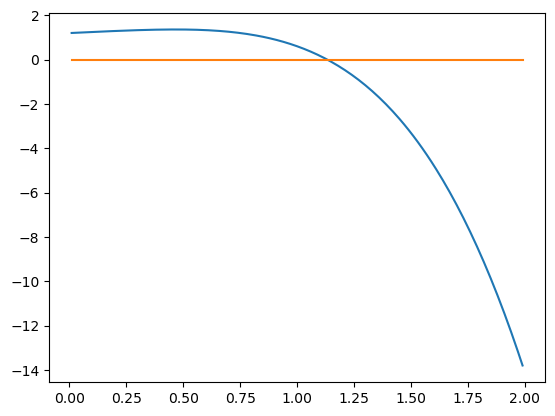

In [358]:
plt.plot(x, [(math.log(i + 2) - i**4 + 0.5) for i in x])
plt.plot(x, [0 for i in x])
plt.show()

$ X$ лежит на интервале $(0.5, 1.25) $

In [359]:
a, b = 0.5, 1.25

## Метод Ньютона

Выпишим функцию и её производные 

In [360]:
def f(x:float) -> float:
    return math.log(x + 2) - x**4 + 0.5 
def f1(x:float) -> float:
    return 1/(x + 2) - 4* x**3
def f11(x:float) -> float:
    return -1/(x + 2)**2 - 12 * x**2

Проверим условия:

1) $f(a) * f(b) < 0$

2) $f(x_0) f''(x_0) > 0$

In [361]:
def check_conditions_newton(f:typing.Callable[[float], float], f11:typing.Callable[[float], float], a:float, b:float, x_num:float) -> bool:
    return f(a) * f(b) < 0 and f(x_num) * f11(x_num) > 0

### Аналитическое вычисление интервала


 Возьмём левую границу за 0, ввиду того, что мы определяем только положительный корень, правую за 10, потому что при 10 функция точно меньше нуля, и будем постеменно искать $x_0$

In [362]:
left = 0
right = 10

In [363]:
def check_diff(a:float, b:float) -> bool:
    return f(a) * f(b) < 0

def check_second_diff(x0:float) -> bool:
    return f11(x0) * f(x0) > 0

def search(left:float, right:float) -> (float, float, float):
    x0 = right - eps
    while(right - left > eps and left < x0):
        x0 = (left + right) / 2
        if check_second_diff(x0):
            return x0, left, right
        if check_diff(left, x0):
            right = x0
        elif check_diff(x0, right):
            left = x0

    if check_second_diff(left):
        return left, left, right
    if check_second_diff(right):
        return right, left, right
    
def Newton(x0:float, eps:float, f:typing.Callable[[float], float]) -> (float, float):
    error = 10 * eps
    itera = 0
    while (error > eps):
        X_new = x0 - (f(x0)/f1(x0))
        error = abs(X_new - x0)
        x0 = X_new
        itera += 1
    return X_new, itera

In [364]:
x0, left, right = search(left, right)

Вычислим x

In [365]:
X_new, itera = Newton(x0, eps, f)

In [366]:
print(X_new, itera)

1.131939665825366 8


Проверим значения функци

In [367]:
f(X_new)

-4.490535519119376e-05

Посмотрим значения функции 

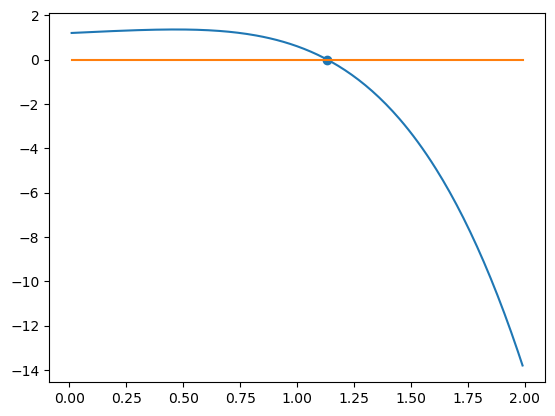

In [368]:
plt.plot(x, [(math.log(i + 2) - i**4 + 0.5) for i in x])
plt.plot(x, [0 for i in x])
plt.scatter(X_new, f(X_new))
plt.show()

Число небольшое, с учетом точности, близкое к нулю

## Метод простой итераций

In [369]:
new_left, new_right = 0, 10

In [370]:
def phi(x:float) -> float:
    return ((math.log(x + 2) + 0.5) ** (1/4)) 

def phi1(x: float) -> float:
    return 1 / (4 * x + 8) * (math.log(x + 2) + 0.5) ** (3/4)

проверим условия : 
1) ϕ(x) ∈ [a,b] ∀ x ∈ [a,b]
2) ∃ q : |ϕ′(x)| <= q ∀ x ∈ [a,b]

In [371]:
def check_conditions_itera(a:float, b:float, phi:typing.Callable[[float], float], phi1:typing.Callable[[float], float]) -> bool:
    x = [i for i in frange(a, b, 0.01)]
    return (max([phi(i) for i in x]) <= b and min([phi(i) for i in x]) <= a and  max([abs(phi1(i)) for i in x ]) < 1)

def left_cond(phi:typing.Callable[[float], float], x:list, left:float)->bool:
    return (min([phi(i) for i in x]) <= left)  # превое условие теоремы

def right_cond(phi:typing.Callable[[float], float], x:list, right:float) -> bool:
    return (max([phi(i) for i in x]) <= right) # первое условие теоремы

def search(left:float, right:float, phi:typing.Callable[[float], float], phi1:typing.Callable[[float], float], eps:float)-> (float, float): 
    x = [i for i in frange(left, right, eps)]
    cnt = 0
    while (right - left > eps):
        cnt += 1
        x = [i for i in frange(left, right, eps)]
        m = (left + right) / 2
        if not right_cond(phi, x, right):
            right = m
        elif not left_cond(phi, x, left):
            left = m
        if check_conditions_itera(left, right, phi, phi1):
            break
        if cnt % 100 == 0:
            print(left, right)
    return phi(left), phi(right)

def get_q(x:float, phi1:typing.Callable[[float], float]) -> float:
    return max([abs(phi1(i)) for i in x ])

In [372]:
new_left, new_right = search(new_left, new_right, phi, phi1, eps)

In [373]:
print(new_left, new_right)

1.250576100686295 1.3144155501961554


In [374]:
def Simple_iteration(X:float, eps:float, q:float, phi:typing.Callable[[float], float]) -> (float, float):
    itera = 0
    error = 10 * eps
    itera = 0
    while (error > eps):
        X_new = phi(X)
        error = q * abs(X_new - X) / (1 - q)
        itera += 1
        X = X_new
    return X, itera

In [375]:
X_ans, itera = Simple_iteration((new_left+new_right)/2, eps, get_q([x for x in frange(new_left, new_right, eps)], phi1), phi)

In [376]:
print(X_ans, itera)

1.132371428061342 2


In [377]:
f(X_ans)

-0.002413298813827902

Близки к нулю в пределах точности

##### 2.2. Реализовать методы простой итерации и Ньютона решения систем нелинейных уравнений в виде программного кода, задавая в качестве входных данных точность вычислений. С использованием разработанного программного обеспечения решить систему нелинейных уравнений (при наличии нескольких решений найти то из них, в котором значения неизвестных являются положительными); начальное приближение определить графически. Проанализировать зависимость погрешности вычислений от количества итераций. 

вариант 23

$$\begin {cases} 2x^2_1 - x_1 + x^2_2 - 1 = 0 \\
x_2 -\tg{(x_1)} = 0
\end{cases}$$

Сначала посмотрим на функцию

In [378]:
x_inter = [i for i in frange(-0.5, 1, 0.1)]

In [379]:
def f_1_low_to_y(x:float) -> float:
    return (-1 * math.sqrt(-2 * x**2 + x + 1))
def f_1_up_to_y(x:float) -> float:
    return math.sqrt(-2 * x**2 + x + 1)
def f_2_form_y(x:float) -> float:
    return math.tan(x)

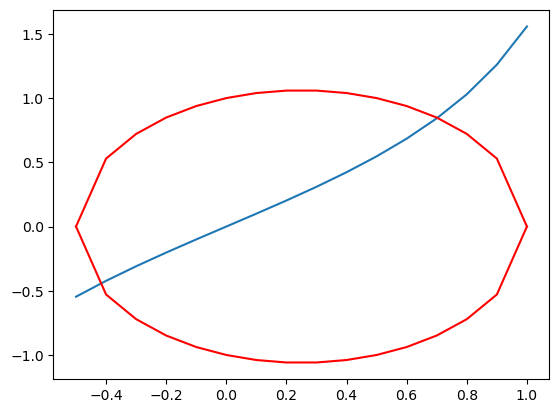

In [380]:
plt.plot(x_inter, [f_2_form_y(i) for i in x_inter])
plt.plot(x_inter, [f_1_low_to_y(i) for i in x_inter], color='red')
plt.plot(x_inter, [ f_1_up_to_y(i) for i in x_inter], color='red')
plt.show()

В виду того, что одна из функций это эллипс, а другая тангенс, следует взять вехнюю часть эллипса, и рассматривать x от центра эллипса до его границы, а у от 0 до максимального значения верхней части эллипса

$2x^2_1 - x_1 + x^2_2 - 1 = 0$

дополним до полных квадратов и найдём все необходимые величины

$\frac{(x_1 - \frac{1}{4})^2}{\frac{9}{16}} + \frac{x_2^2}{\frac{9}{8}} = 1$

Теперь очевидно, что центр эллипса в точке $(\frac{1}{4}, 0)$, а его правая граница при $ (x_1 > 0) $: $x_1^{max} = \frac{1}{4} + \sqrt{\frac{9}{16}} = 1$, левая  при $x_1^{min} = \frac{1}{4}$, аналогично нижняя граница $x_2^{min} = 0$, а верхняя при  $ x_2^{max} = \frac{3}{2\sqrt{2}}$

за начальные значения возьмём $x_1^0 = \frac{x_1^{max} + x_1^{min}}{2} = \frac{5}{8}$, аналогично для $x_2^0 = \frac{x_2^{max} + x_2^{min}}{2} =  \frac{3}{4\sqrt{2}}$

### метод ньютона

In [381]:
x_left = 1/4
x_right = 1
y_left = 0
y_right = 3/2/math.sqrt(2)
x_inter = [i for i in frange(x_left, x_right, 10*eps)]
y_inter = [i for i in frange(y_left, y_right, (y_right - y_left) / len(x_inter))]
x_0 = (x_left + x_right) / 2
y_0 = (y_left + y_right) / 2


In [382]:
import numpy as np
def decomposition(A:np.array) -> (np.array, np.array):

  n = len(A)
  L = np.array([[float(i == j) for j in range(n)] for i in range(n)])
  U = A.copy()


  for i in range(n-1):
    for j in range(i+1, n):
      f = - U[j,i]/U[i,i]  
      L[j,i]=-f                      
      U[j,i:n] = U[j,i:n] + f * U[i,i:n]
  return L, U

def det(A:np.array) -> float:
    d = 1
    _, U = decomposition(np.array(A))
    for i in range(len(U)):
        d *= U[i,i] 
    return d


In [383]:
def fsys(x:float, y:float) -> list:
    return [2 * x**2 - x + y**2 - 1, y - math.tan(x)]

def jac(x:float, y:float) -> list:
    return [
        [4*x - 1, 2*y],
        [-math.cos(x) ** 2, 1]
        ]
def Newton_sys(x:float, y:float, fsys:typing.Callable[[float, float], list], jac:typing.Callable[[float, float], list], eps:float):
    itera = 0
    error = 10 * eps
    while (error > eps):
        x_new = x - det(np.array(
            [[fsys(x, y)[0], jac(x, y)[0][1]], [fsys(x, y)[1], jac(x, y)[1][1]]])) / det(np.array(jac(x, y)))
        y_new = y - det(np.array([
            [jac(x, y)[0][0], fsys(x, y)[0]], [jac(x, y)[1][0], fsys(x, y)[1]]])) / det(np.array(jac(x, y)))
        error = max(abs(x_new - x), abs(y_new - y))
        x, y = x_new, y_new
        itera += 1
    return x_new, y_new, itera

In [384]:
x, y = x_0, y_0
x_ans, y_ans, itera = Newton_sys(x, y, fsys, jac, eps)


In [385]:
print(x_ans, y_ans, itera)

0.6988918686096419 0.8498264208817832 10


In [386]:
fsys(x_ans, y_ans)

[0.00021276503645362155, 0.009430569660921373]

Близки к нулю с учетом погрешности

### Метод простых итераций

$$ 2x^2 - x + y^2 -1 = 0 $$

$$ y = phi(x, y) = \sqrt{-2x^2 + x + 1} $$

$$ y = phi(x, y) = -\sqrt{-2x^2 +x + 1} $$

$$ x = phi(x, y) =  \frac{1 + \sqrt{1 + 8y^2}}{4} $$

$$ x = phi(x, y) =  \frac{1 - \sqrt{1 + 8y^2}}{4} $$

$$ y - \tg{x} = 0 $$

$$ y = phi(x, y) = \tg{(x)} $$

$$ x = phi(x, y) = \arctg{(y)} $$

In [387]:
def phi1x1(x:float, y:float) -> float:
    return (1 + math.sqrt(1 + 8 * y**2))/4
def phi1x2(x:float, y:float) -> float:
    return (1 - math.sqrt(1 + 8*y**2))/4
def phi1y1(x:float, y:float) -> float:
    return  math.sqrt(- 2*x**2 + x + 1)
def phi1y2(x:float, y:float) -> float:
    return -math.sqrt(- 2*x**2 + x + 1) 
def phi2x(x:float, y:float) -> float:
    return math.atan(y)
def phi2y(x:float, y:float) -> float:
    return math.tan(x)
def dphi1(x:float, y:float) -> list:
    return [0, 1/(y**2 + 1)]
def dphi2(x:float, y:float) -> list:
    return [(1- 4*x) / (2* math.sqrt(-2 * x**2 + x + 1)), 0] if (-2 * x**2 + x + 1) != 0 else [0, 0]

для вычисления ошибки нам необходимо значение q

In [388]:
def get_q(x_inter:list, y_inter:list, dphi1:typing.Callable[[float, float], list], dphi2:typing.Callable[[float, float], list]) -> float:
    return max([max(abs(dphi1(x, y)[0]) + abs(dphi1(x, y)[1]), abs(dphi2(x, y)[0]) + abs(dphi2(x, y)[1])) for x, y in zip(x_inter, y_inter)])

In [389]:
def find_q(x_0:float, x_left:float, x_right:float, y_0:float, y_left:float, y_right:float, get_q:typing.Callable[[list, list, typing.Callable[[float, float], list], typing.Callable[[float, float], list]], float], eps:float) -> (float, float, float, float, float):
    x_inter = [i for i in frange(x_left, x_right, 10*eps)]
    y_inter = [i for i in frange(y_left, y_right, (y_right - y_left)/ len(x_inter))]
    q = get_q(x_inter, y_inter, dphi1, dphi2)
    while (x_right > x_left and y_right > y_left) and q > 1:
        x_left = (x_left + x_0) / 2
        x_right = (x_right + x_0) / 2
        y_left = (y_left + y_0) / 2
        y_right = (y_right + y_0) / 2
        x_inter = [i for i in frange(x_left, x_right, 0.1)]
        y_inter = [i for i in frange(y_left, y_right, (y_right - y_left)/ len(x_inter))]
        q = get_q(x_inter, y_inter, dphi1, dphi2)
    return x_left, x_right, y_left, y_right, q

def Simple_iteration_sys(x:float, y:float, phi1:typing.Callable[[float, float], float], phi2:typing.Callable[[float, float], float], eps:float, q:float) -> (float, float, int):
    itera = 0
    error = 10 * eps
    while(error > eps):
        x_new = phi1(x, y)
        y_new = phi2(x, y)
        error = q / (1 - q) * max(abs(x_new - x), abs(y_new - y))
        x, y = x_new, y_new
        itera += 1
    return x, y, itera

In [390]:
x_left = 1/4
x_right = 1
y_left = 0
y_right = 3/2/math.sqrt(2)
x_inter = [i for i in frange(x_left, x_right, 10*eps)]
y_inter = [i for i in frange(y_left, y_right, (y_right - y_left) / len(x_inter))]
x_0 = (x_left + x_right) / 2
y_0 = (y_left + y_right) / 2

In [391]:
new_x_left, new_x_right, new_y_left, new_y_right, q = find_q(x_0, x_left, x_right, y_0, y_left, y_right, get_q, eps)

Отлично, всё согласно условиям теоремы

In [392]:
print(new_x_left, new_x_right, new_y_left, new_y_right, q)

0.53125 0.71875 0.397747564417433 0.6629126073623883 0.863406408094435


In [394]:
x, y = (new_x_left + new_x_right) / 2, (new_y_left + new_y_right) / 2
x_ans, y_ans, itera = Simple_iteration_sys(x, y, phi2x, phi1y1, eps, q)

In [395]:
print(x_ans, y_ans, itera)

0.7020103022974876 0.8452261687717129 24


In [396]:
fsys(x_ans, y_ans)

[-0.0019660968573597115, -0.0005045557836269587]

значения близки к нулю с улловием погрешности